This solution has a pH of: 8.31 and a conductivity of: 82.57 uS/cm
5.597348330459039


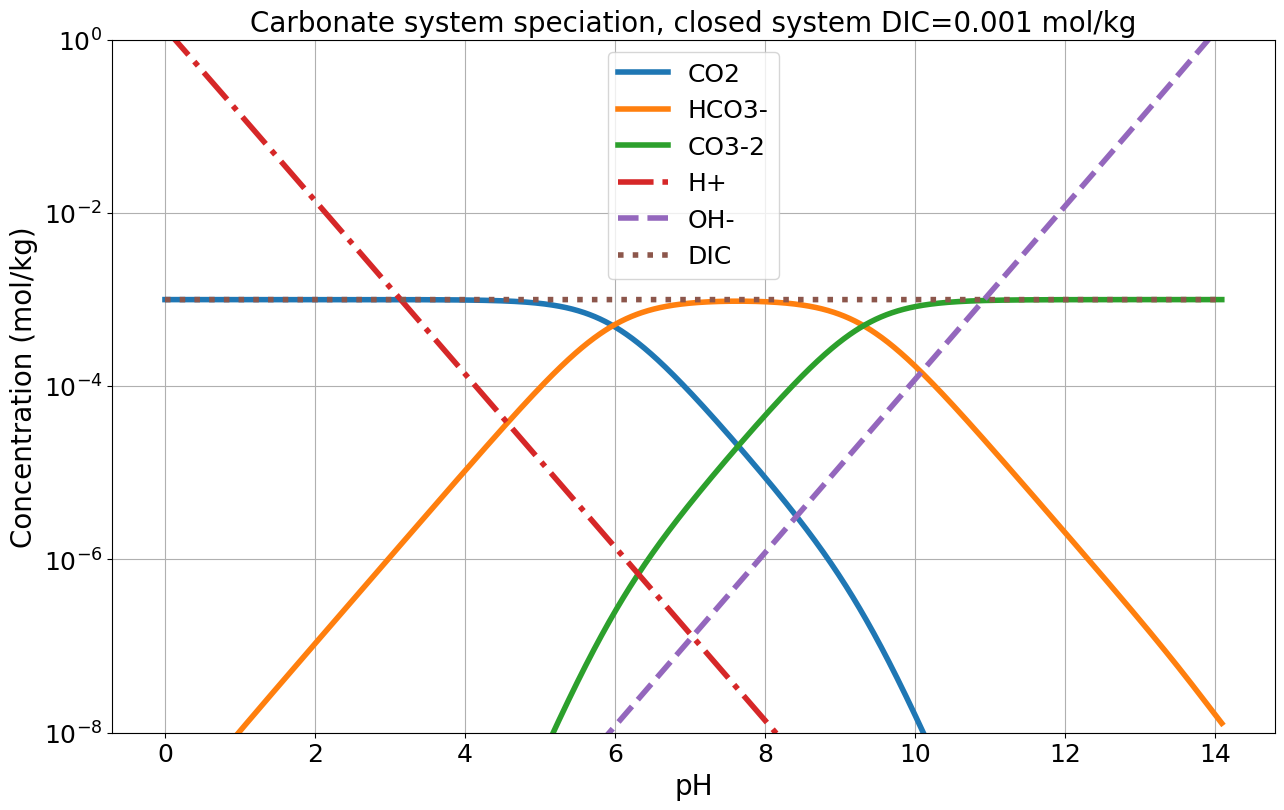

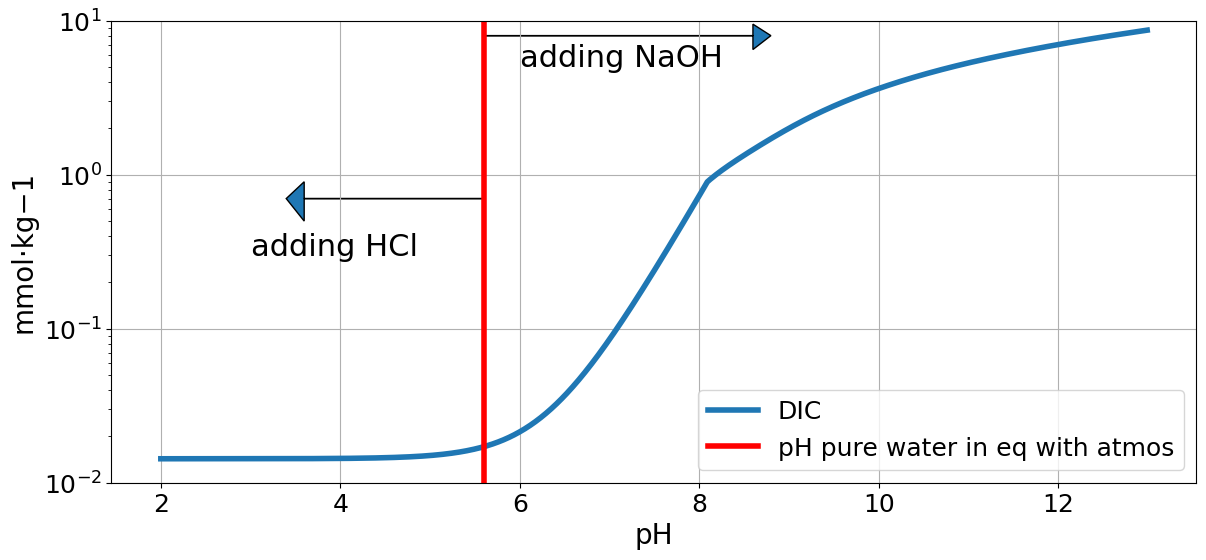

In [46]:

import numpy as np

#package to work with html documents
#import dash_html_components as html


#open system model

import pandas as pd




from matplotlib import pyplot as plt


# set global fontsize stuff


# type plt.rcParams.keys()   to get all settings


# https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

plt.rcParams.update({'font.size': 22,
                     #font.weight':'bold',
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'lines.linewidth' :  4,
                     'axes.labelsize'  : 20.0,
                     'axes.titlesize':  20,
                     'figure.titlesize': 'x-large',
                     'legend.fontsize': 18.0,})




#import the package for carbonate system calculation chemistry

from phreeqpython import PhreeqPython



# create new PhreeqPython instance
pp = PhreeqPython(database='vitens.dat')

'''
model the bjerum plot with phreeeqc python

produce a soluion and change pH  (adding NaOH or HCL)   

'''




DIC=0.001

#add some organic acids 


solution=pp.add_solution_simple({'NaHCO3':1},temperature=20) # in Phreeqc default units are mmol/kgw

#relative plots



print("This solution has a pH of: {0:.2f} and a conductivity of: {1:.2f} uS/cm".format(solution.pH,solution.sc))

phs = []
co2 = []
hco3 = []
co3 = []
H= []
OH = []


f=1

#change pH is done by adding strong acid  HCl   or strong base NaOH


for pH in np.arange(0,14.1,0.01):
    # change the solution pH
    solution.change_ph(pH)
    # get and store the ph, CO2, HCO3 and CO3
    phs.append(pH)
    co2.append(solution.total('CO2',units='mol')*f)
    co3.append(solution.total('CO3',units='mol')*f)
    hco3.append(solution.total('HCO3',units='mol')*f)
    H.append(solution.species['H+']) # given in mol/l
    OH.append(solution.species['OH-']) # given in mol/l






dic = [sum(x) for x in zip(co2, hco3, co3)]


fig = plt.figure(figsize=[15,9])
plt.plot(phs,co2,label='CO2')
plt.plot(phs,hco3,label='HCO3-')
plt.plot(phs,co3,label='CO3-2')
plt.plot(phs,H,linestyle='dashdot',label='H+')
plt.plot(phs,OH,linestyle='dashed',label='OH-')
plt.plot(phs,dic,linestyle='dotted', label='DIC')
plt.xlabel("pH")
plt.yscale('log')
plt.ylim([1e-8,1e0])
#plt.xlim([2,12])
plt.ylabel("Concentration (mol/kg)")
plt.title("Carbonate system speciation, closed system DIC={} mol/kg".format(DIC))
lgnd = plt.legend()
ax = plt.gca()
ax.grid(True)
plt.savefig('closed-carbonate-system-speciation.pdf')  





# fig2 = plt.figure(figsize=[14,6])
# plt.plot(lines['pH'],lines['DIC'],label='DIC')
# plt.xlabel("pH")
# plt.yscale('log')
# plt.ylabel('μmol·kg−1')







DIC=[]
pH_value=[]
CO2=[]
HCO3=[]
CO3=[]



# pCO2 in ppm
pCO2=415

#open system  with phreeqc

T=25

#alkalinity in umol
alk=10000

#convert umol/L concentartion in mmol/L  
c=alk*1e-3


#step in negative
step=0.000001
#step=0.00010



a=-np.logspace(4,-8,num=100,base=10)

b=np.logspace(-6,4,num=100,base=10)

long=np.concatenate((a, b), axis=None)




#choose alkalinity and not NaHCO3 concentration as this cant be zero

#positive alkainity
pH_high=np.arange(6,13.01,0.01)

pH_low=np.arange(0,5,0.01)

pH_full=np.arange(2,13,0.01)

# mmol is the input 
#sol=pp.add_solution_simple({'NaHCO3':0.001},temperature=T) # in Phreeqc default units are mmol/kgw

sol=pp.add_solution({'temp':T})

#change the alkalinty in increments
for c in pH_full:
    
    # the pressure default unit is atm so I convert the ppm to atm
    p=pCO2*1e-6
    
    #if pCO2!=0:
     
    #change the pH by adding  HCl or NaOH
    #sol.change_ph(c,'NaOH')
    #sol.change_ph(c,'HCl')
    sol.change_ph(c)
    
    
    #here I have to check what to use for pressure
    CO2_gas=pp.add_gas({'CO2(g)':p}, pressure=p , fixed_pressure=True)
    
    
    
    # reaction with ambient CO2 pressure
    sol.interact(CO2_gas)
    
    
    
    co2=sol.total('CO2',units='mmol')
    hco3=sol.total('HCO3',units='mmol')
    co3=sol.total('CO3',units='mmol')
    
    dic=co2+hco3+co3
    
    
    #write data into two lists for plots later
    DIC.append(dic)
    CO2.append(co2)
    HCO3.append(hco3)
    CO3.append(co3)
    pH_value.append(sol.pH)
    
    # delete the gas
    #sol.forget();CO2_gas.forget()





# for negative alkalinity one needs to add acid from pH=5.6




# the zero alkalinity pH
solution_zero=pp.add_solution({'temp':25})


#here I have to check what to use for pressure
CO2_gas=pp.add_gas({'CO2(g)':p}, pressure=p , fixed_pressure=True)
 
 
# reaction with ambient CO2 pressure
solution_zero.interact(CO2_gas)

# react
zero_pH=solution_zero.pH

print(zero_pH)

'''
DIC pH relationship plot 


Syntax: matplotlib.pyplot.arrow(x, y, dx, dy, **kwargs)
Parameters: 
x, y: The x and y coordinates of the arrow base. 
dx, dy: The length of the arrow along x and y direction. 
**kwargs: Optional arguments that helps in adding properties to arrow, like 
adding color to arrow, changing width of arrow 

'''

fig3 = plt.figure(figsize=[14,6])
plt.plot(pH_value,DIC,label='DIC')
plt.xlabel("pH")
plt.yscale('log')
plt.ylim([1e-2,1e1])
plt.ylabel('mmol·kg−1')

 


# only one line may be specified; full height
plt.axvline(x=zero_pH, color = 'r', label = 'pH pure water in eq with atmos')

plt.arrow(zero_pH, 0.7, -2, 0, head_width=0.4,head_length=0.2)
plt.text(3, 0.3, "adding HCl")
plt.arrow(zero_pH, 8, 3, 0, head_width=3,head_length=0.2)
plt.text(6,5,"adding NaOH")
plt.legend()
ax = plt.gca()
ax.grid(True)
plt.savefig('DIC-pH-relationship.pdf') 



In [10]:
# bjerum plot for citric acid



In [63]:
#use another database with more organics


pp = PhreeqPython(database='minteq.v4_lukas_edit.dat')

c_org_acid=1


acids=['H(Acetate)','H3(Citrate)','H(Formate)','NaHCO3']

sol=pp.add_solution_simple({acids[1]:c_org_acid},temperature=20, units='mmol')


print(sol.pH)


pH_full=np.arange(1,8,0.01)


print(sol.species)


#create empty lists depending on how often the acid can deprotonate



citrate=[]

H_citrate=[]

H2_citrate=[]

H3_citrate=[]

phs=[]

for c in pH_full:
    
    #change pH
    sol.change_ph(c)
    
    #conjugate bases
    citrate.append(sol.total('Citrate-3',units='mmol'))
    H_citrate.append(sol.total('H(Citrate)-2',units='mmol'))
    H2_citrate.append(sol.total('H2(Citrate)-',units='mmol'))
    H3_citrate.append(sol.total('H3(Citrate)',units='mmol'))
    
    phs.append(sol.pH)



3.2407643902341623
{'Citrate-3': 1.4745304445464654e-08, 'H(Citrate)-2': 1.799017548698519e-05, 'H+': 0.0005906365493863671, 'H2': 3.087955197437157e-40, 'H2(Citrate)-': 0.0005545805209585289, 'H2O': 55.50683295973886, 'H3(Citrate)': 0.0004274145590168026, 'O2': 2.1440138721284907e-15, 'OH-': 1.2277941567659601e-11}


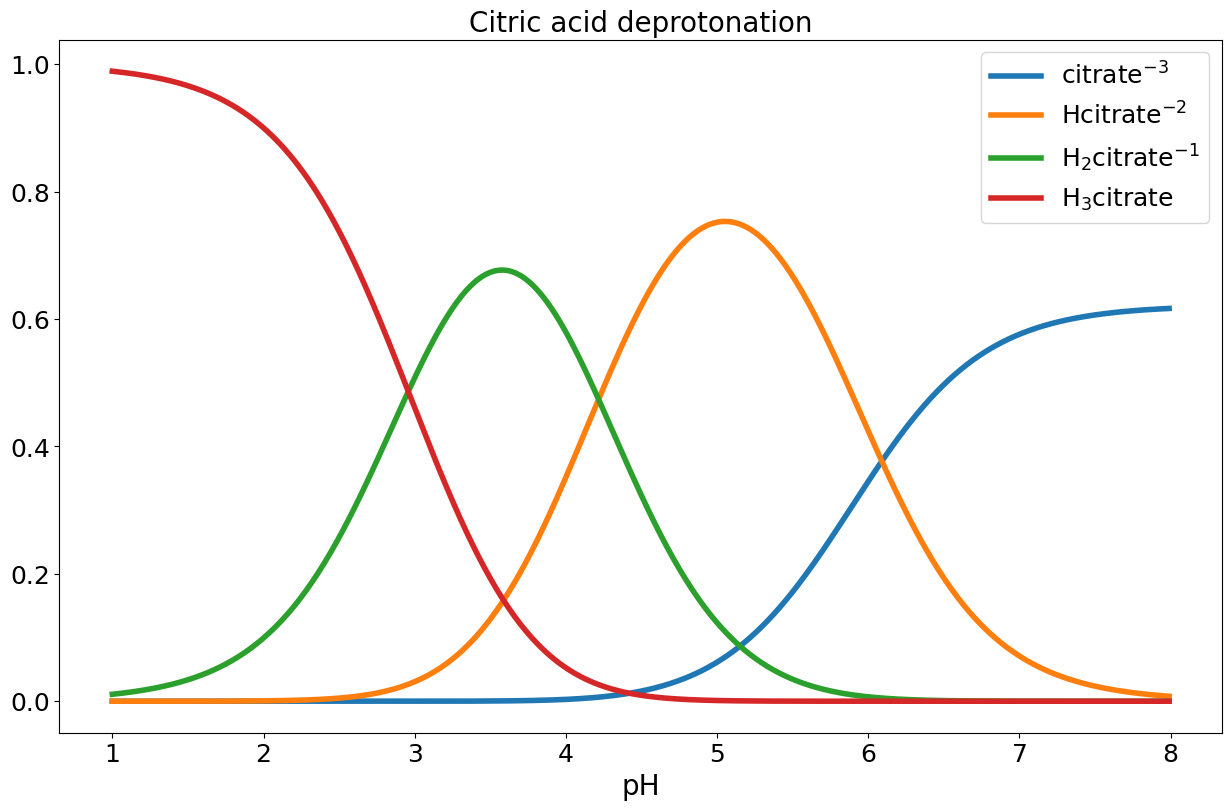

In [76]:
fig = plt.figure(figsize=[15,9])
plt.plot(phs,citrate,label='citrate$^{-3}$')
plt.plot(phs,H_citrate,label='Hcitrate$^{-2}$')
plt.plot(phs,H2_citrate,label='H$_{2}$citrate$^{-1}$')
plt.plot(phs,H3_citrate,label='H$_{3}$citrate')
plt.title('Citric acid deprotonation')
plt.xlabel('pH')
plt.legend()

#titration stop point line


    # change the ph
    def change_ph(self, to_pH, with_chemical=None):
        """ Change the pH of a solution by dosing either HCl and NaOH, or a user supplied acid or base """
        # default to NaOH and HCl
        if not with_chemical:
            if to_pH < self.pH:
                # dose HCl to lower pH
                self.pp.equalize_solution(self.number, "Fix_pH", -to_pH, 10, "HCl")
            else:
                # dose NaOH to raise pH
                self.pp.equalize_solution(self.number, "Fix_pH", -to_pH, 10, "NaOH")
        else:
            self.pp.equalize_solution(self.number, "Fix_pH", -to_pH, 10, with_chemical)
        return self

    